## NAME: JUDE TOCHUKWU OGBOZOR

## TITLE: G2M insight for Cab Investment firm 

## DATE: 13TH MAY, 2022

In [24]:
import pandas as pd
import datasist as ds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline


In [25]:
cab_data = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Cab_Data.csv')
cab_data.head(3)

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632


In [26]:
#Add Profit column
cab_data["Profit per KM"]= (cab_data["Price Charged"]- cab_data["Cost of Trip"])/(cab_data["KM Travelled"])

In [27]:
#change date of travel to datetime type
cab_data['Date of Travel']=pd.to_datetime(cab_data['Date of Travel'],unit='D',origin='1899-12-30')

In [28]:
ds.structdata.describe(cab_data)

First five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit per KM
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,1.882266
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,0.826904
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,3.049558
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,0.777751
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,1.929439




Random five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit per KM
148720,10183160,2017-06-06,Yellow Cab,NEW YORK NY,34.00,974.81,461.0400,15.110882
110065,10134658,2017-01-04,Yellow Cab,WASHINGTON DC,30.16,438.62,412.5888,0.863103
6585,10008372,2016-02-07,Yellow Cab,NEW YORK NY,4.44,148.46,57.5424,20.476937
281229,10345548,2018-07-08,Pink Cab,LOS ANGELES CA,31.50,355.37,324.4500,0.981587
341274,10417944,2018-11-30,Yellow Cab,LOS ANGELES CA,26.16,427.46,313.9200,4.340214




Last five data points


,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Profit per KM
359387,10440101,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,1.225000
359388,10440104,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,0.821667
359389,10440105,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,3.150270
359390,10440106,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,3.652500
359391,10440107,2018-01-02,Yellow Cab,WASHINGTON DC,12.76,191.58,177.6192,1.094107




Shape of  data set: (359392, 8)


Size of  data set: 2875136


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Date of Travel,datetime64[ns]
Company,object
City,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64
Profit per KM,float64




Column(s) {'Date of Travel'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit per KM']


Categorical Features in Data set


['Company', 'City']



Statistical Description of Columns


,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit per KM
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,6.083579
std,1.268058e+05,12.233526,274.378911,157.993661,5.543493
min,1.000001e+07,1.900000,15.600000,19.000000,-4.998235
25%,1.011081e+07,12.000000,206.437500,151.200000,2.000385
50%,1.022104e+07,22.440000,386.360000,282.480000,4.466809
75%,1.033094e+07,32.960000,583.660000,413.683200,9.170006
max,1.044011e+07,48.000000,2048.030000,691.200000,41.115556




Description of Categorical Features


,count,unique,top,freq
Company,359392,2,Yellow Cab,274681
City,359392,19,NEW YORK NY,99885




Unique class Count of Categorical features


,Feature,Unique Count
0,Company,2
1,City,19




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Date of Travel,0,0.0
2,Company,0,0.0
3,City,0,0.0
4,KM Travelled,0,0.0
5,Price Charged,0,0.0
6,Cost of Trip,0,0.0
7,Profit per KM,0,0.0


In [29]:
Corre_cab_data= cab_data.corr()
Corre_cab_data

,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit per KM
Transaction ID,1.000000,-0.001429,-0.052902,-0.003462,-0.110524
KM Travelled,-0.001429,1.000000,0.835753,0.981848,-0.000538
Price Charged,-0.052902,0.835753,1.000000,0.859812,0.473222
Cost of Trip,-0.003462,0.981848,0.859812,1.000000,0.031053
Profit per KM,-0.110524,-0.000538,0.473222,0.031053,1.000000


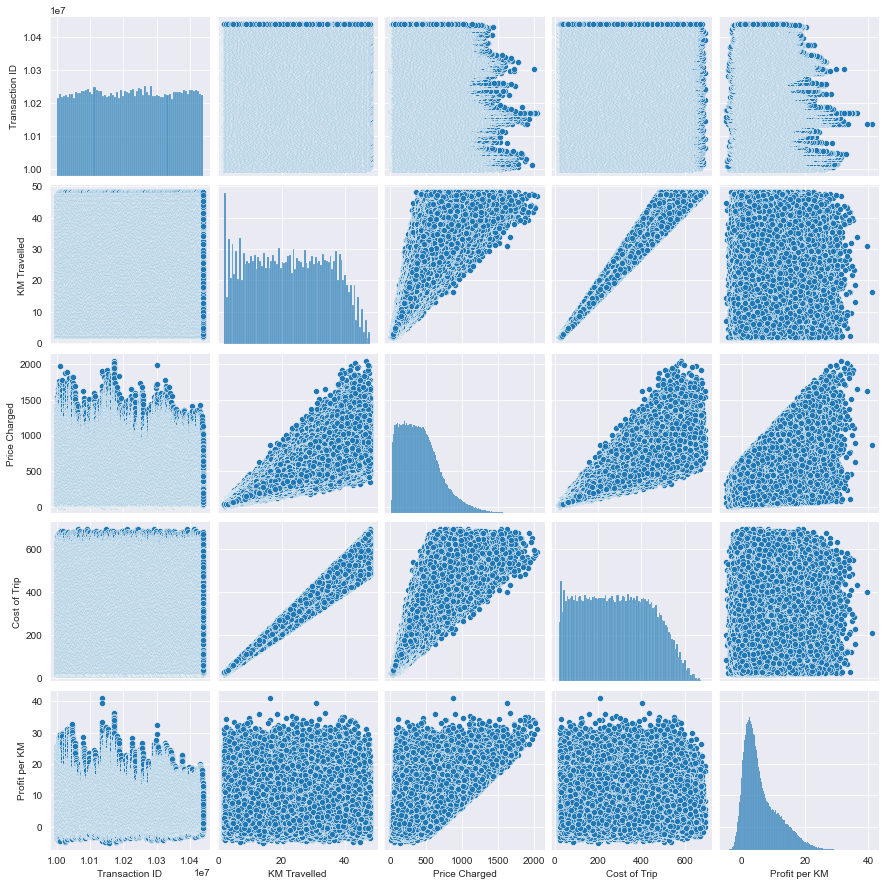

In [30]:
sns.pairplot(cab_data)

In [31]:
city=pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/City.csv')
city.dtypes

City          object
Population    object
Users         object
dtype: object

Change the population and user type to integer

In [32]:
city.sample(5)

,City,Population,Users
7,PHOENIX AZ,"943,999","6,133"
9,ATLANTA GA,"814,885","24,701"
10,DENVER CO,"754,233","12,421"
8,DALLAS TX,"942,908","22,157"
2,LOS ANGELES CA,"1,595,037","144,132"


Remove the comma which will prevent the dtype change to integer

In [33]:
city["Population"]=city.Population.str.replace("[,]", "", regex=True)
city["Users"]=city.Users.str.replace("[,]", "", regex=True)

In [34]:

city.head(2)

,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468


In [35]:
city[["Users","Population"]]=city[["Users","Population"]].astype(int)

In [36]:
ds.structdata.describe(city)

First five data points


,City,Population,Users
0,NEW YORK NY,8405837,302149
1,CHICAGO IL,1955130,164468
2,LOS ANGELES CA,1595037,144132
3,MIAMI FL,1339155,17675
4,SILICON VALLEY,1177609,27247




Random five data points


,City,Population,Users
6,SAN DIEGO CA,959307,69995
2,LOS ANGELES CA,1595037,144132
19,BOSTON MA,248968,80021
14,SAN FRANCISCO CA,629591,213609
0,NEW YORK NY,8405837,302149




Last five data points


,City,Population,Users
15,SACRAMENTO CA,545776,7044
16,PITTSBURGH PA,542085,3643
17,WASHINGTON DC,418859,127001
18,NASHVILLE TN,327225,9270
19,BOSTON MA,248968,80021




Shape of  data set: (20, 3)


Size of  data set: 60


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
City,object
Population,int32
Users,int32




Numerical Features in Data set
['Population', 'Users']


Categorical Features in Data set


['City']



Statistical Description of Columns


,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000




Description of Categorical Features


,count,unique,top,freq
City,20,20,NEW YORK NY,1




Unique class Count of Categorical features


,Feature,Unique Count
0,City,20




Missing Values in Data


,features,missing_counts,missing_percent
0,City,0,0.0
1,Population,0,0.0
2,Users,0,0.0


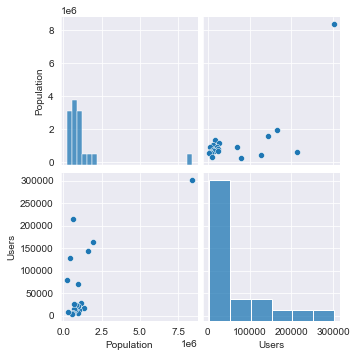

In [37]:
sns.pairplot(city)

In [38]:
corre_city=city.corr()
corre_city

,Population,Users
Population,1.000000,0.703382
Users,0.703382,1.000000


In [39]:
customer_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Customer_ID.csv')
ds.structdata.describe(customer_ID)

First five data points


,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536




Random five data points


,Customer ID,Gender,Age,Income (USD/Month)
26365,6708,Male,18,19391
36928,32057,Female,35,5228
1111,42519,Male,32,7486
44296,34431,Female,23,16473
44921,22367,Male,30,13075




Last five data points


,Customer ID,Gender,Age,Income (USD/Month)
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454
49170,39761,Female,32,10128




Shape of  data set: (49171, 4)


Size of  data set: 196684


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Customer ID,int64
Gender,object
Age,int64
Income (USD/Month),int64




Numerical Features in Data set
['Customer ID', 'Age', 'Income (USD/Month)']


Categorical Features in Data set


['Gender']



Statistical Description of Columns


,Customer ID,Age,Income (USD/Month)
count,49171.000000,49171.000000,49171.000000
mean,28398.252283,35.363121,15015.631856
std,17714.137333,12.599066,8002.208253
min,1.000000,18.000000,2000.000000
25%,12654.500000,25.000000,8289.500000
50%,27631.000000,33.000000,14656.000000
75%,43284.500000,42.000000,21035.000000
max,60000.000000,65.000000,35000.000000




Description of Categorical Features


,count,unique,top,freq
Gender,49171,2,Male,26562




Unique class Count of Categorical features


,Feature,Unique Count
0,Gender,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Customer ID,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Income (USD/Month),0,0.0


In [40]:
transaction_ID = pd.read_csv('https://raw.githubusercontent.com/DataGlacier/DataSets/main/Transaction_ID.csv')
ds.structdata.describe(transaction_ID)

First five data points


,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card




Random five data points


,Transaction ID,Customer ID,Payment_Mode
138780,10138791,6568,Cash
125484,10125495,59978,Cash
328844,10328855,7598,Cash
356948,10356959,3632,Card
305225,10305236,51078,Card




Last five data points


,Transaction ID,Customer ID,Payment_Mode
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card
440097,10440108,51587,Card




Shape of  data set: (440098, 3)


Size of  data set: 1320294


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
Transaction ID,int64
Customer ID,int64
Payment_Mode,object




Numerical Features in Data set
['Transaction ID', 'Customer ID']


Categorical Features in Data set


['Payment_Mode']



Statistical Description of Columns


,Transaction ID,Customer ID
count,4.400980e+05,440098.000000
mean,1.022006e+07,23619.513120
std,1.270455e+05,21195.549816
min,1.000001e+07,1.000000
25%,1.011004e+07,3530.000000
50%,1.022006e+07,15168.000000
75%,1.033008e+07,43884.000000
max,1.044011e+07,60000.000000




Description of Categorical Features


,count,unique,top,freq
Payment_Mode,440098,2,Card,263991




Unique class Count of Categorical features


,Feature,Unique Count
0,Payment_Mode,2




Missing Values in Data


,features,missing_counts,missing_percent
0,Transaction ID,0,0.0
1,Customer ID,0,0.0
2,Payment_Mode,0,0.0


In [41]:
#merge some table with common reference
merge1 =pd.merge(city,cab_data,on='City',how='outer')
merge2 =pd.merge(customer_ID,transaction_ID,on='Customer ID',how='outer')


In [42]:
#Create a master dataframe
Master_df=pd.merge(merge1,merge2,on='Transaction ID',how='outer')
data=Master_df.dropna()
ds.structdata.describe(data)

First five data points


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
0,NEW YORK NY,8405837.0,302149.0,10000139.0,2016-01-08,Pink Cab,17.85,242.90,198.135,2.507843,2416.0,Male,28.0,21399.0,Cash
1,NEW YORK NY,8405837.0,302149.0,10000140.0,2016-01-09,Pink Cab,25.30,407.21,255.530,5.995257,2060.0,Male,18.0,8149.0,Card
2,NEW YORK NY,8405837.0,302149.0,10000141.0,2016-01-06,Pink Cab,16.32,236.41,186.048,3.085907,1451.0,Male,35.0,23989.0,Card
3,NEW YORK NY,8405837.0,302149.0,10000142.0,2016-01-04,Pink Cab,12.43,194.61,144.188,4.056476,1609.0,Male,30.0,23036.0,Card
4,NEW YORK NY,8405837.0,302149.0,10000143.0,2016-01-09,Pink Cab,29.70,434.57,350.460,2.831987,2927.0,Male,33.0,14520.0,Cash




Random five data points


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
299438,WASHINGTON DC,418859.0,127001.0,10160266.0,2017-04-03,Yellow Cab,13.52,179.72,168.7296,0.812899,51185.0,Male,50.0,14642.0,Card
146744,CHICAGO IL,1955130.0,164468.0,10359644.0,2018-08-10,Yellow Cab,46.80,644.36,578.4480,1.408376,5388.0,Male,46.0,9801.0,Card
66065,NEW YORK NY,8405837.0,302149.0,10290252.0,2018-01-05,Yellow Cab,12.12,288.74,171.6192,9.663432,685.0,Male,64.0,11272.0,Card
222174,ORANGE COUNTY,1030185.0,12994.0,10292608.0,2018-01-05,Yellow Cab,39.96,1359.74,546.6528,20.347528,17327.0,Male,40.0,12844.0,Card
263300,DENVER CO,754233.0,12421.0,10310406.0,2018-03-17,Yellow Cab,18.56,393.78,258.3552,7.296595,32151.0,Female,24.0,22315.0,Card




Last five data points


,City,Population,Users,Transaction ID,Date of Travel,Company,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Gender,Age,Income (USD/Month),Payment_Mode
359388,BOSTON MA,248968.0,80021.0,10437872.0,2018-01-04,Yellow Cab,1.96,26.23,25.1664,0.542653,59926.0,Female,59.0,4172.0,Card
359389,BOSTON MA,248968.0,80021.0,10437873.0,2018-01-05,Yellow Cab,23.52,380.22,338.6880,1.765816,57905.0,Male,60.0,31941.0,Card
359390,BOSTON MA,248968.0,80021.0,10437874.0,2018-01-06,Yellow Cab,29.10,393.33,391.1040,0.076495,57906.0,Male,37.0,26410.0,Cash
359391,BOSTON MA,248968.0,80021.0,10437875.0,2018-01-08,Yellow Cab,3.33,42.31,46.7532,-1.334294,59259.0,Male,51.0,15360.0,Cash
359392,BOSTON MA,248968.0,80021.0,10437876.0,2018-01-03,Yellow Cab,23.75,349.91,290.7000,2.493053,59908.0,Male,30.0,8909.0,Card




Shape of  data set: (359392, 15)


Size of  data set: 5390880


Data Types
Note: All Non-numerical features are identified as objects in pandas


,Data Type
City,object
Population,float64
Users,float64
Transaction ID,float64
Date of Travel,datetime64[ns]
Company,object
KM Travelled,float64
Price Charged,float64
Cost of Trip,float64
Profit per KM,float64




Column(s) {'Date of Travel'} should be in Datetime format. Use the [to_date] function in datasist.feature_engineering to convert to Pandas Datetime format


Numerical Features in Data set
['Population', 'Users', 'Transaction ID', 'KM Travelled', 'Price Charged', 'Cost of Trip', 'Profit per KM', 'Customer ID', 'Age', 'Income (USD/Month)']


Categorical Features in Data set


['City', 'Company', 'Gender', 'Payment_Mode']



Statistical Description of Columns


,Population,Users,Transaction ID,KM Travelled,Price Charged,Cost of Trip,Profit per KM,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,3.132198e+06,158365.582267,1.022076e+07,22.567254,423.443311,286.190113,6.083579,19191.652115,35.336705,15048.822937
std,3.315194e+06,100850.051020,1.268058e+05,12.233526,274.378911,157.993661,5.543493,21012.412463,12.594234,7969.409482
min,2.489680e+05,3643.000000,1.000001e+07,1.900000,15.600000,19.000000,-4.998235,1.000000,18.000000,2000.000000
25%,6.712380e+05,80021.000000,1.011081e+07,12.000000,206.437500,151.200000,2.000385,2705.000000,25.000000,8424.000000
50%,1.595037e+06,144132.000000,1.022104e+07,22.440000,386.360000,282.480000,4.466809,7459.000000,33.000000,14685.000000
75%,8.405837e+06,302149.000000,1.033094e+07,32.960000,583.660000,413.683200,9.170006,36078.000000,42.000000,21035.000000
max,8.405837e+06,302149.000000,1.044011e+07,48.000000,2048.030000,691.200000,41.115556,60000.000000,65.000000,35000.000000




Description of Categorical Features


,count,unique,top,freq
City,359392,19,NEW YORK NY,99885
Company,359392,2,Yellow Cab,274681
Gender,359392,2,Male,205912
Payment_Mode,359392,2,Card,215504




Unique class Count of Categorical features


,Feature,Unique Count
0,City,19
1,Company,2
2,Gender,2
3,Payment_Mode,2




Missing Values in Data


,features,missing_counts,missing_percent
0,City,0,0.0
1,Population,0,0.0
2,Users,0,0.0
3,Transaction ID,0,0.0
4,Date of Travel,0,0.0
5,Company,0,0.0
6,KM Travelled,0,0.0
7,Price Charged,0,0.0
8,Cost of Trip,0,0.0
9,Profit per KM,0,0.0


<AxesSubplot:xlabel='City', ylabel='count'>

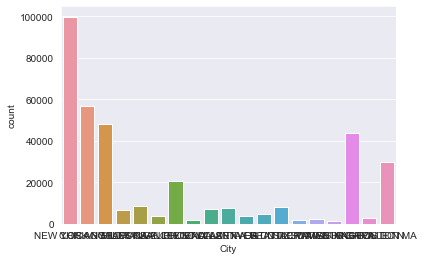

In [43]:
#countplot of some categorical data

sns.set_style('darkgrid')
sns.countplot(x='City', data=data)


<AxesSubplot:xlabel='City'>

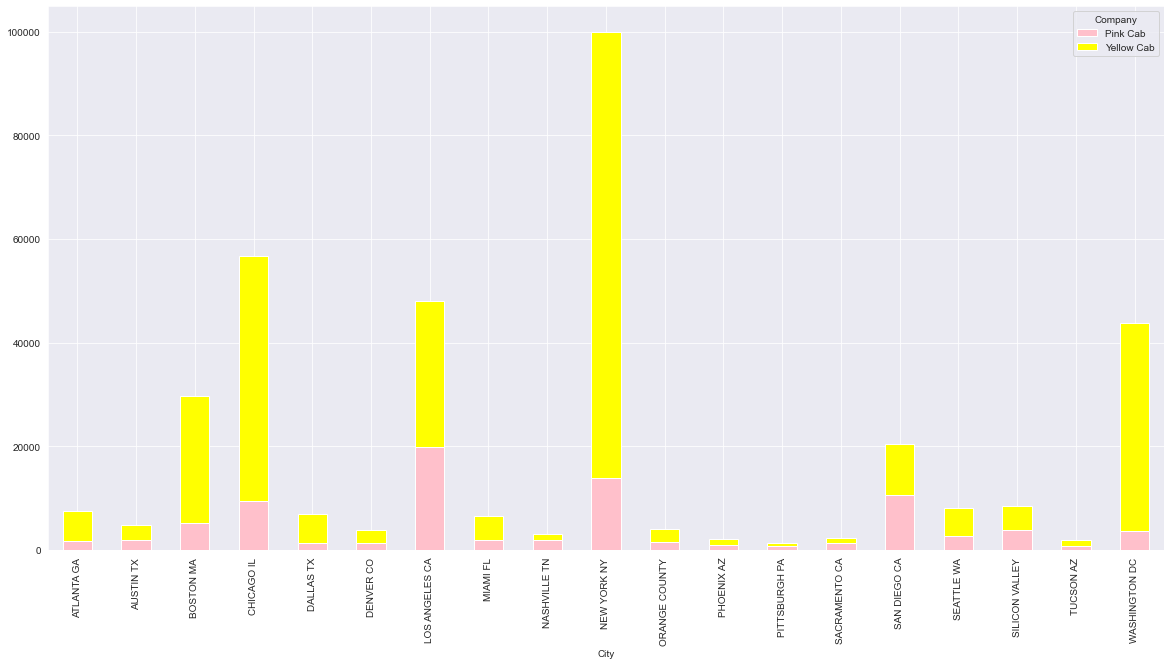

In [46]:
sum_city=data.groupby(by=['City','Company']).count() ['Users'].unstack('Company')
sum_city.plot(kind='bar', figsize=(20,10),color=['pink','yellow'],stacked=True)

<AxesSubplot:xlabel='Company', ylabel='count'>

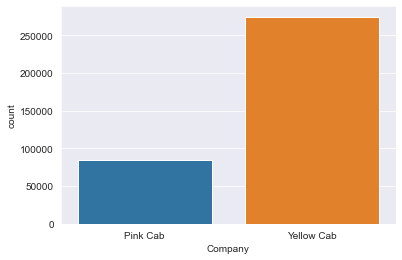

In [44]:
sns.countplot(x='Company',data=data, hue_order=['Gender','Payment_Mode'])

<AxesSubplot:xlabel='Company', ylabel='Cost of Trip'>

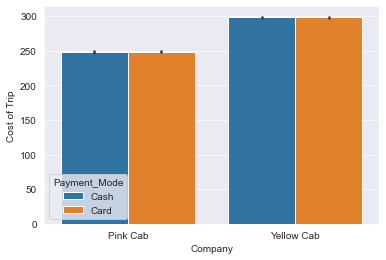

In [45]:
sns.barplot(x='Company',y='Cost of Trip',data=data, hue='Payment_Mode')

## EDA RECOMMENDATION

with the few analysis done with the available data, it can be seen that Yellow cab will be a good investment to be done.